In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tadasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from classical_betti_calc import boundary, homology, betti
from utils import make_simplicies
import seaborn as sns

sns.set_theme()

In [2]:
np.random.seed(3)

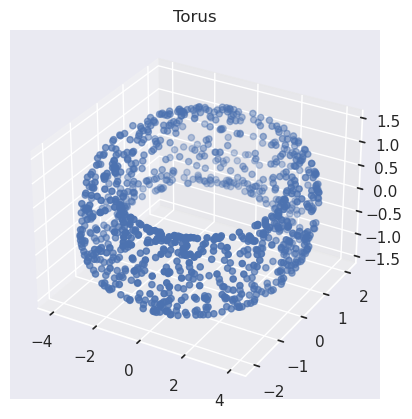

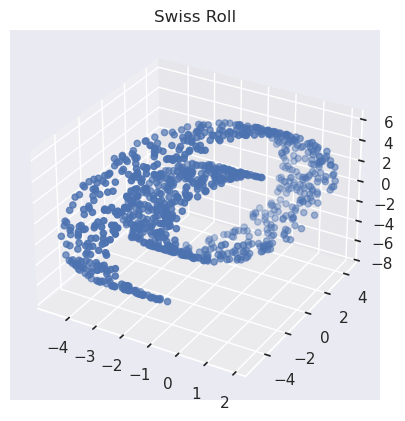

In [3]:
"""
n is the number of points to be sampled from the shape
c is the distance between center of torus tube to the center
a is radius of the torus tube
ambient is the dimension of the space the shape is embedded into after randomly rotating
r is the lenght of the swiss roll
noise is the noise in the sampled points
"""
example_torus = tadasets.torus(n=1000, c=5, a=1, ambient=10, noise=0)
example_swiss_roll = tadasets.swiss_roll(n=1000, r=5, ambient=10, noise=0)

tadasets.plot3d(example_torus)
plt.title("Torus")
plt.show()

tadasets.plot3d(example_swiss_roll)
plt.title("Swiss Roll")
plt.show()

# Rotation in the images might make it difficult to see.
# Re-run this cell to get new images

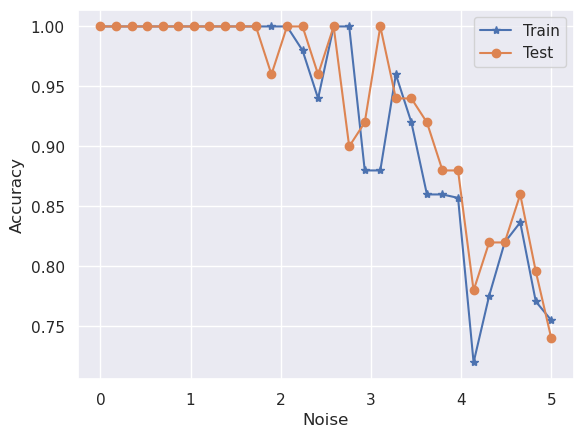

In [4]:
all_accs = [[], []]
all_noises = np.linspace(0, 5, 30)
for noise in all_noises:
    # Creating random images with set noise for the dataset
    torus = [tadasets.torus(n=62, c=5, a=1, ambient=10, noise=noise) for _ in range(50)]
    swiss_roll = [
        tadasets.swiss_roll(n=62, r=5, ambient=10, noise=noise) for _ in range(50)
    ]

    all_shapes = []
    all_shapes.extend(torus)
    all_shapes.extend(swiss_roll)

    labels = np.zeros(100)
    labels[50:] = 1

    scs = make_simplicies(all_shapes, 2, 5)

    new_features = []
    skipped = []
    for i, sc in enumerate(scs):
        try:
            bnd, simplicies = boundary(sc)
            H = homology(bnd)
            b = betti(H)
            new_features.append([b[0], b[1]])
        except:
            skipped.append(i)
    
    # New features are the calculated Betti numbers 0 and 1
    new_features = np.array(new_features)
    labels = np.delete(labels, skipped)
    
    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(
        new_features, labels, test_size=0.5, stratify=labels, random_state=0
    )

    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_predict_test = model.predict(X_test)
    y_predict_train = model.predict(X_train)

    test_acc = accuracy_score(y_test, y_predict_test)
    train_acc = accuracy_score(y_train, y_predict_train)

    all_accs[0].append(train_acc)
    all_accs[1].append(test_acc)

plt.plot(all_noises, all_accs[0], "*-")
plt.plot(all_noises, all_accs[1], "o-")
plt.legend(["Train", "Test"])
plt.ylabel("Accuracy")
plt.xlabel("Noise")
plt.show()

We see that the classifier can use Betti numbers to perfectly classify the shapes.
The accuracy starts to dip with noise ~2 but stays at 100% till then.
Initially, each shape had 10 dimensional 62 points (=620 numbers). Using TDA, we reduced each shape to only 2 numbers and still achieved perfect accuracy.
This demonstrates the power of TDA and the advantage QTDA can provide.